# `Matplotlib` Animation Tutorial
For quite a long time, animation in `matplotlib` was not an easy task and was done mainly through clever hacks. However, things have started to change since version 1.1 and the introduction of tools for creating animation very intuitively, with the possibility to save them in all kind of formats (but don't expect to be able to run very complex animation at 60 fps though).
## 1. Basic Animation
The animation tools center around the `matplotlib.animation.Animation` base class, which provides a framework around which the animation functionality is built. The main interfaces are `TimedAnimation` and `FuncAnimation`, which you can read more about in the [documentation](http://matplotlib.org/api/animation_api.html). The most useful way of the two is `FuncAnimation` object that specifies to `matplotlib` what is the figure to update, what is the update function and what is the delay between frames.

## 2. Setup

### 2.1. Installing `JSAnimation`
In order to display animations on the web page, we need JSAnimation module to be installed. If you haven't done that yet, follow the following steps:

1. Pull the most recent version of the class csci-2000-class-resources repository from GitHub.
2. Go to csci-2000-class-resources directory.
3. Copy the `JSAnimation` module to your `Anaconda` distribution by running the following command:
```bash
$ cp -rf csci-2000-class-resources/game_of_life/JSAnimation ~/anaconda3/lib/python3.4/site-packages/
```

### 2.2. Making `matplotlib` Inline
We need to make `matplotlib` inline in order to embed plots into the web page:

In [68]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 2.3. Importing Necessary Modules
We also import `numpy`, `pyplot`, `animation` and `JSAnimation` once to prevent redundancy for the rest of the tutorial:

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

## 3. Moving Sine Wave
First we'll use `FuncAnimation` to do a basic animation of a sine wave moving across the screen:


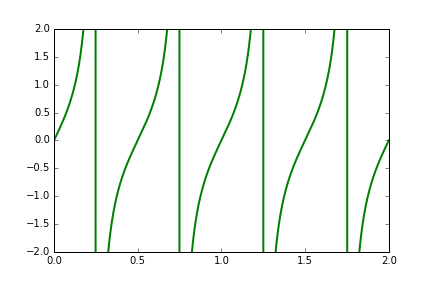
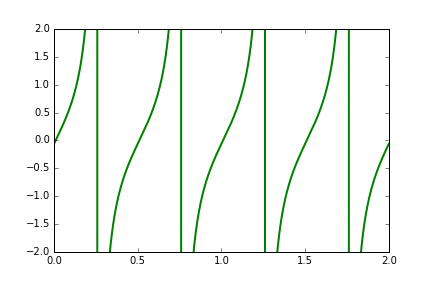
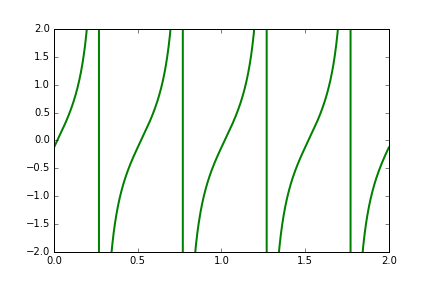
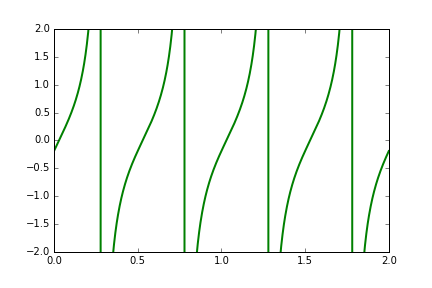
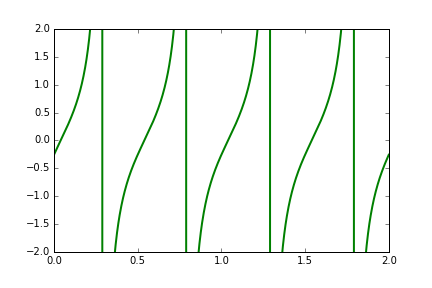
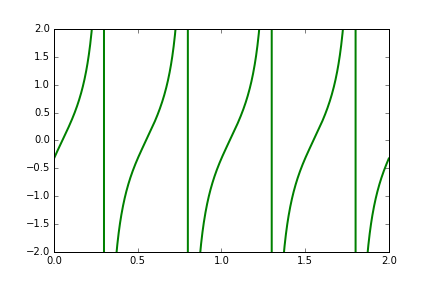
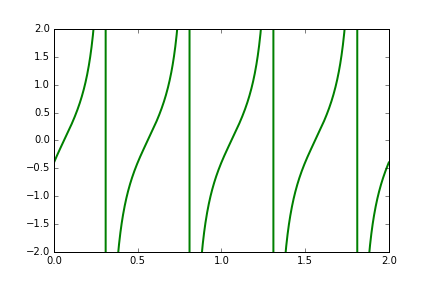
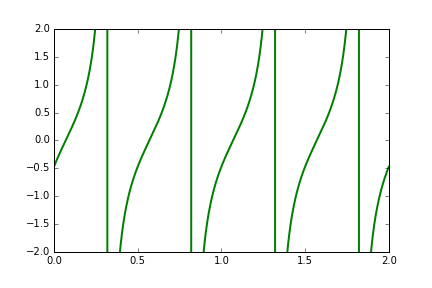
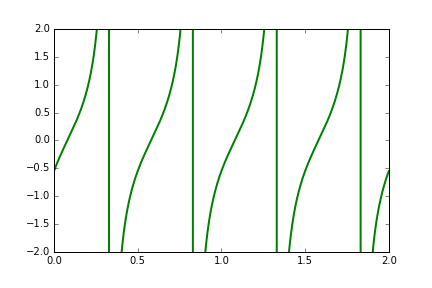
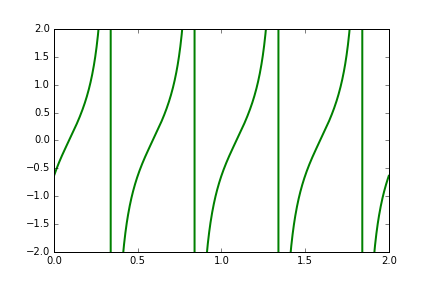
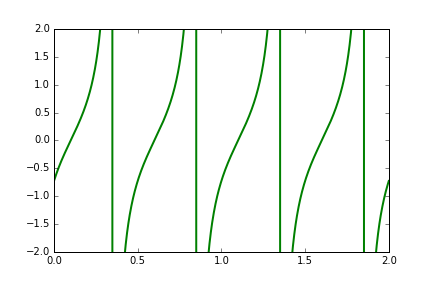
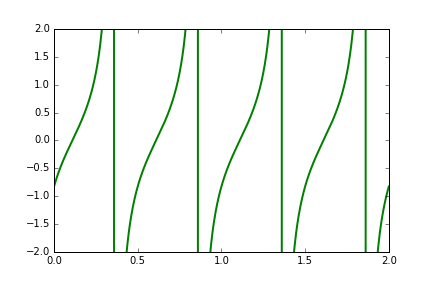
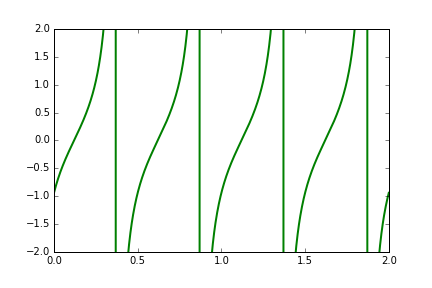
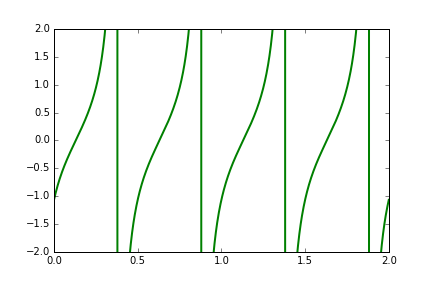
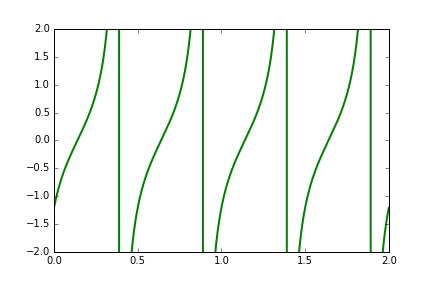
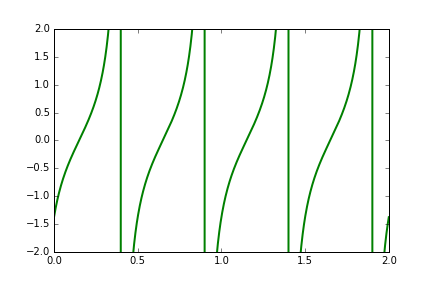
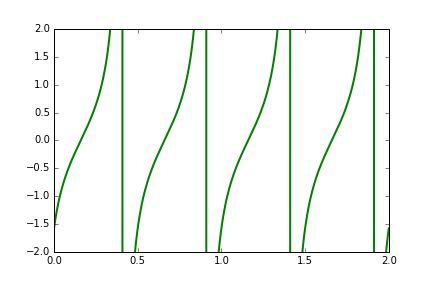
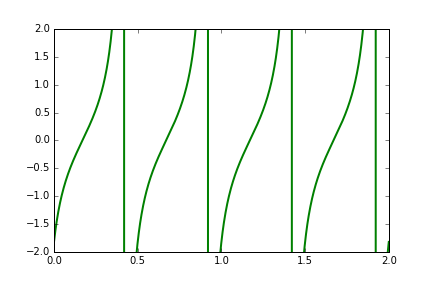
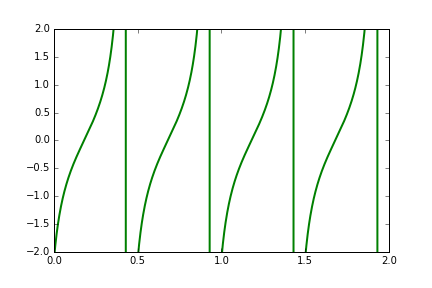
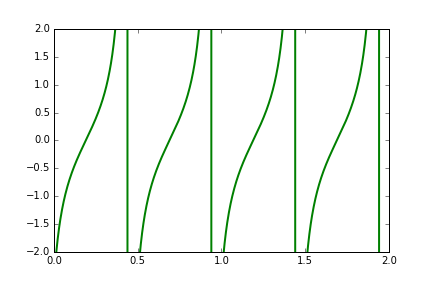
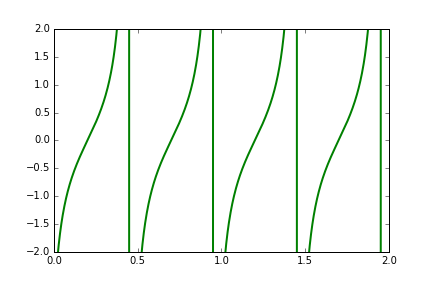
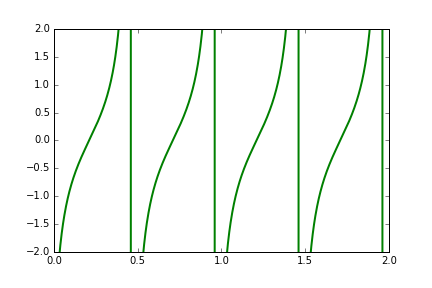
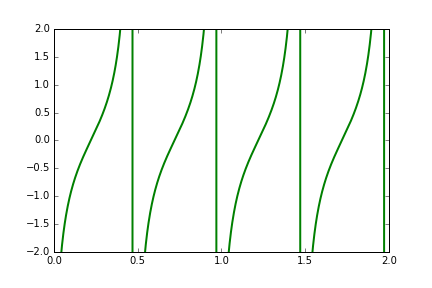
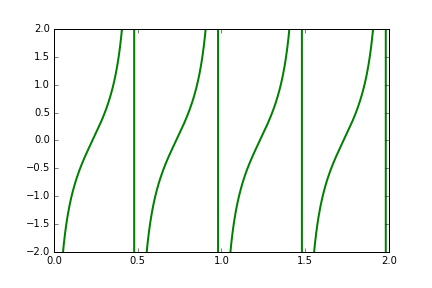
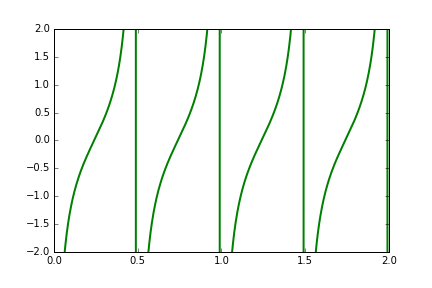
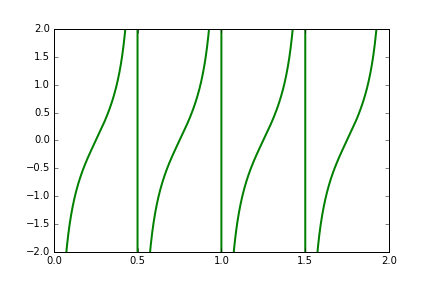
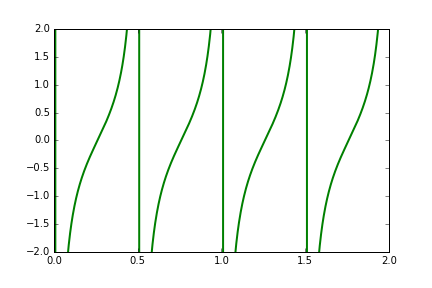
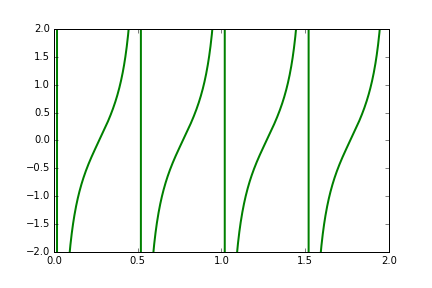
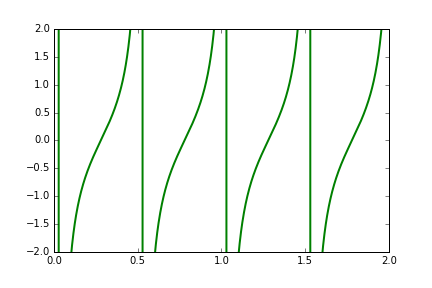
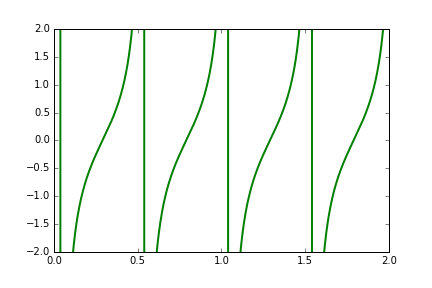
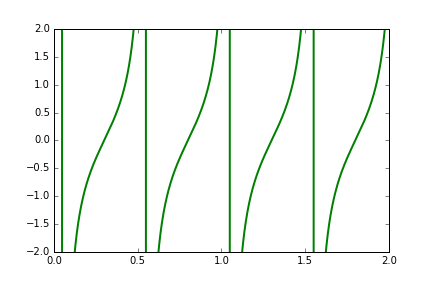
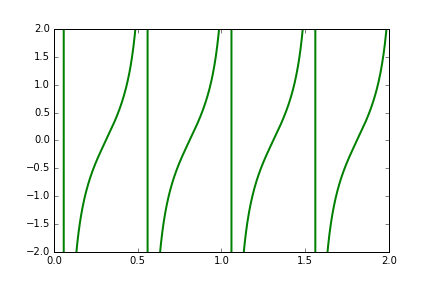
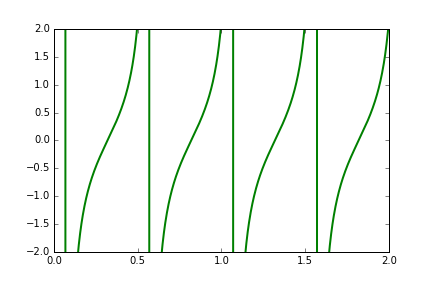
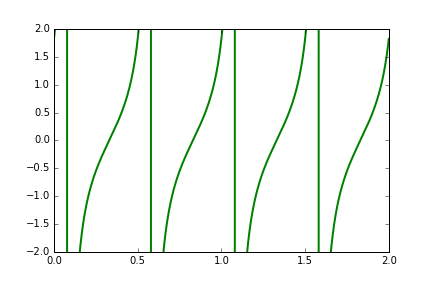
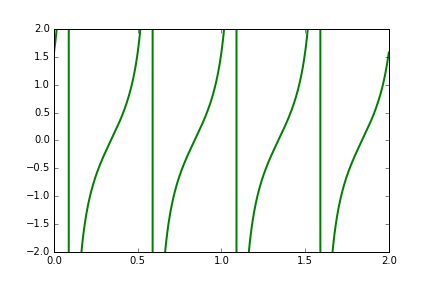
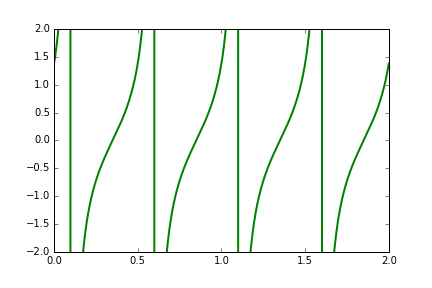
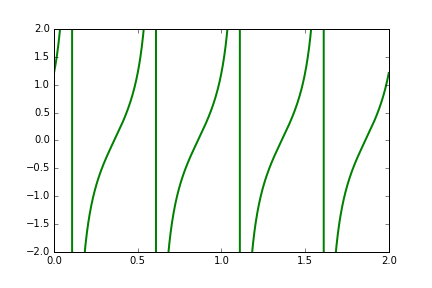
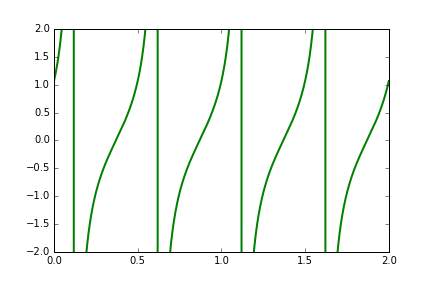
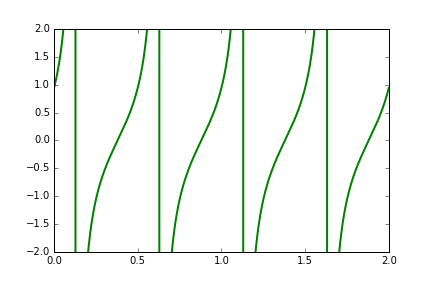
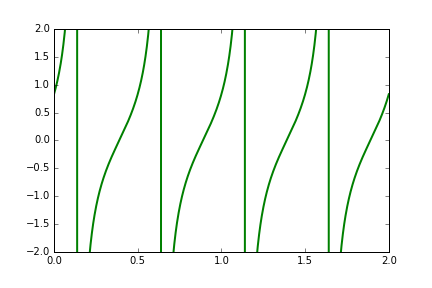
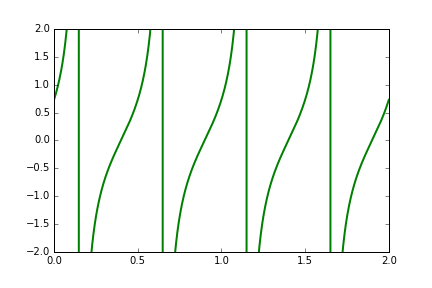
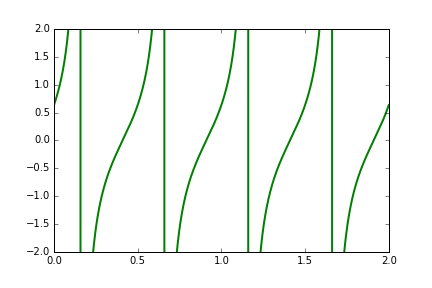
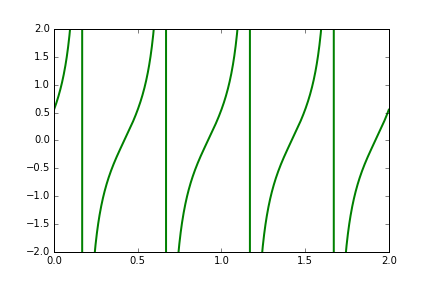
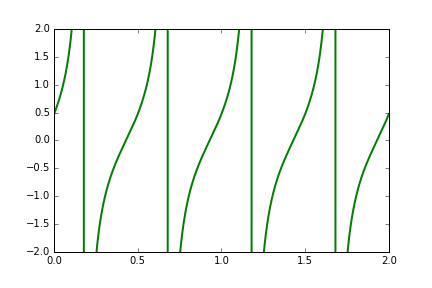
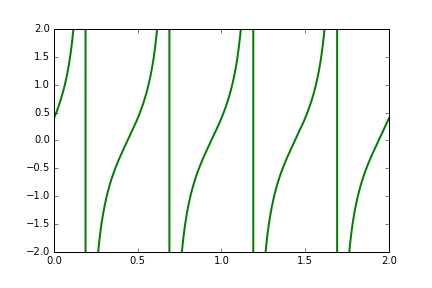
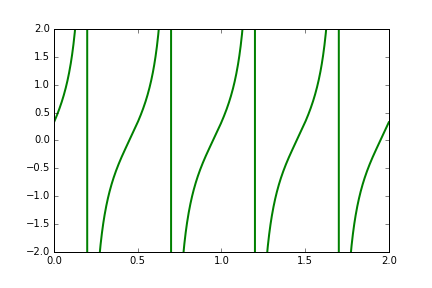
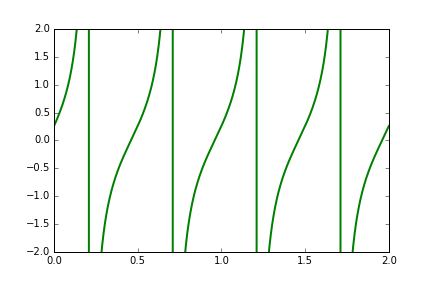
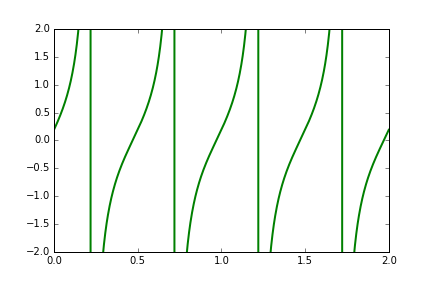
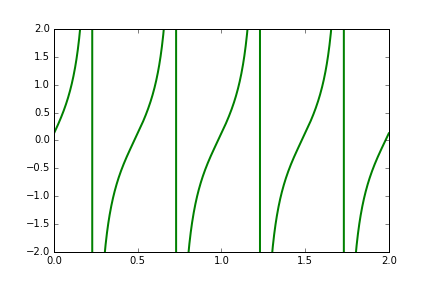
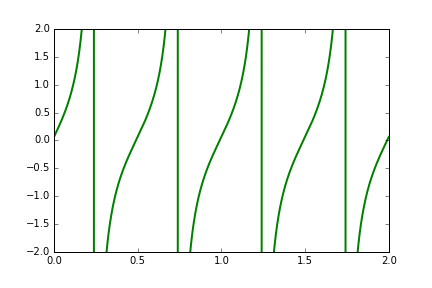
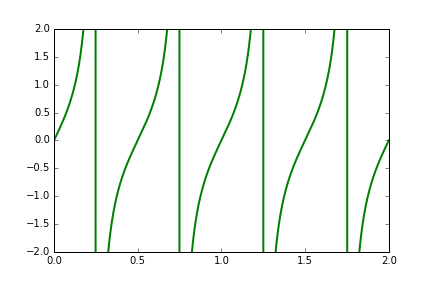
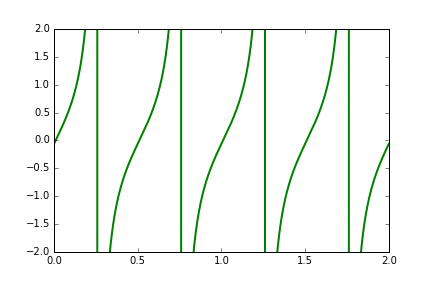
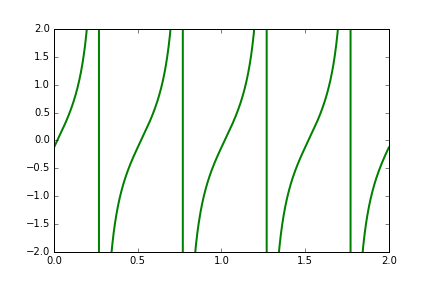
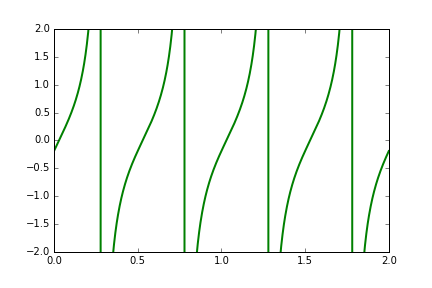
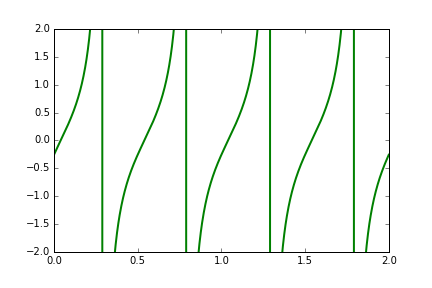
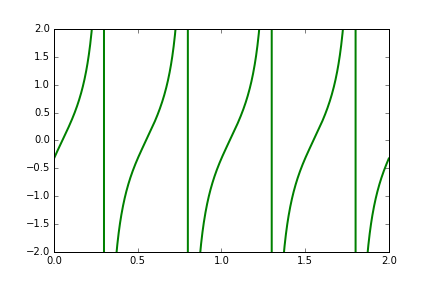
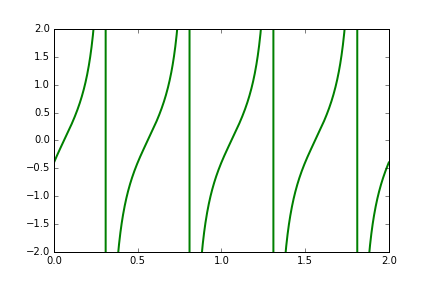
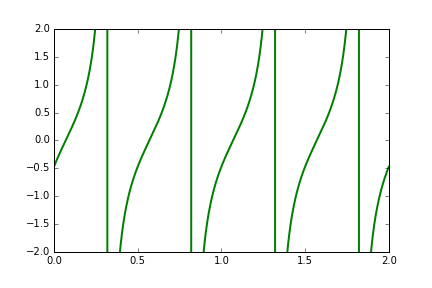
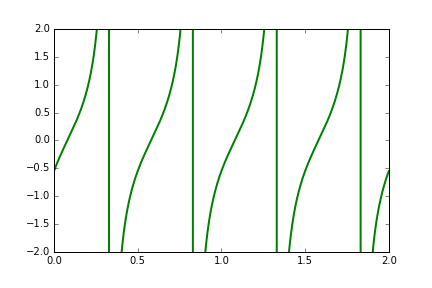
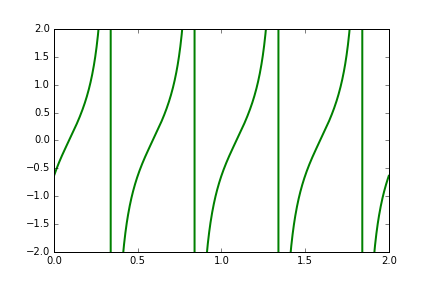
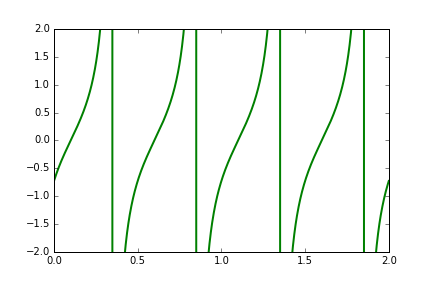
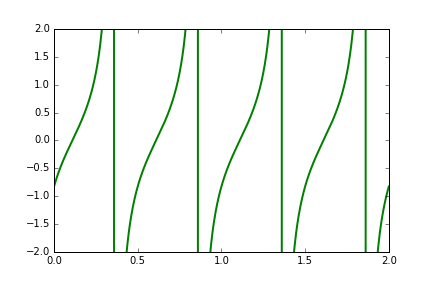
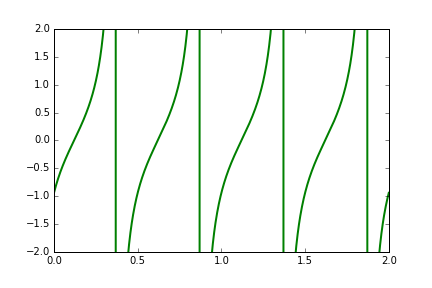
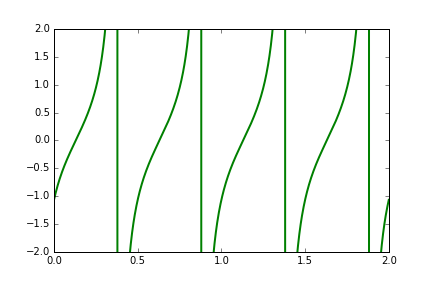
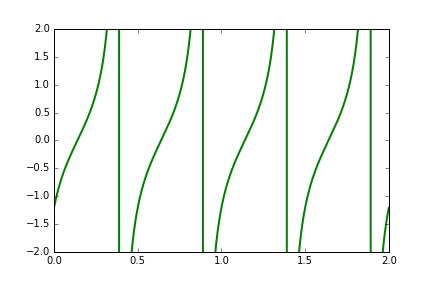
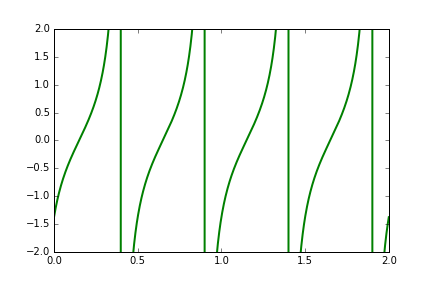
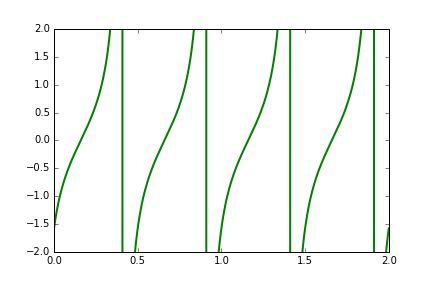
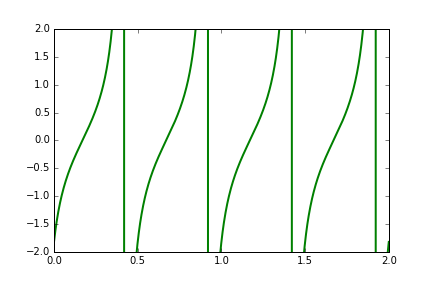
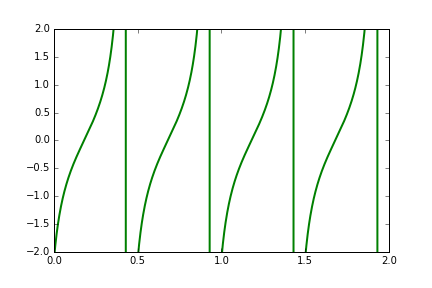
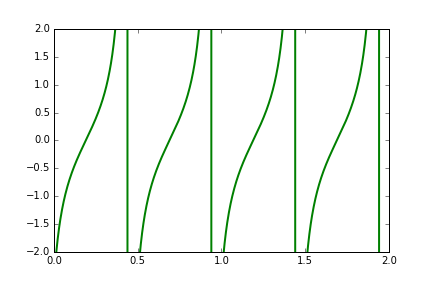
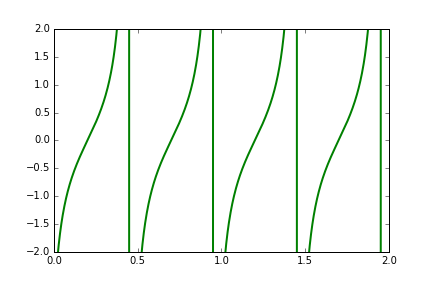
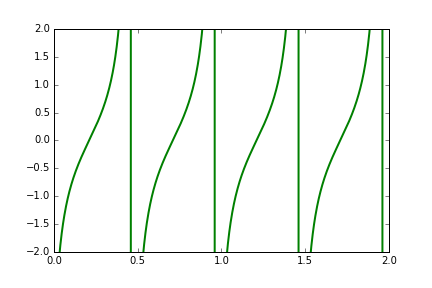
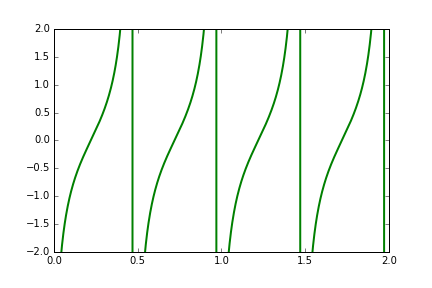
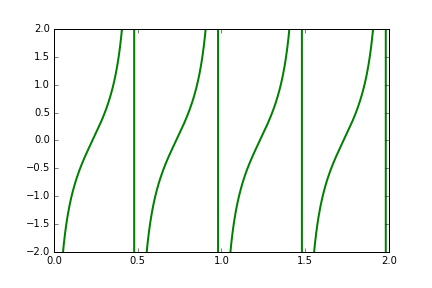
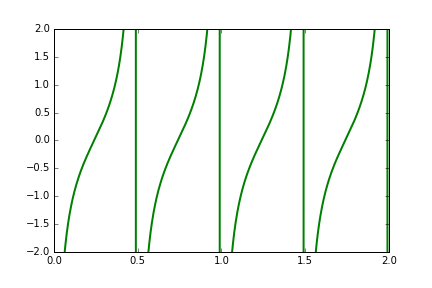
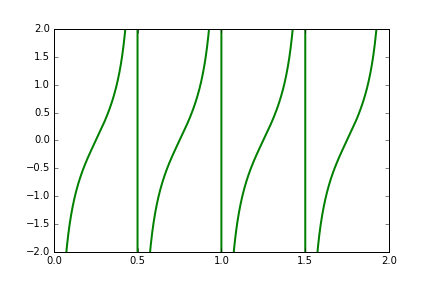
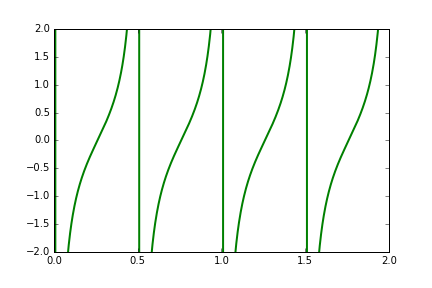
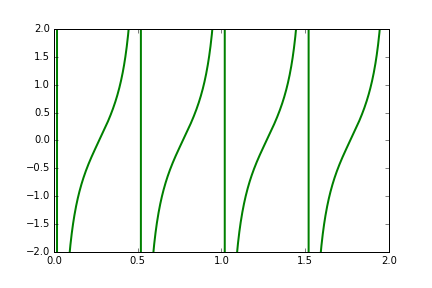
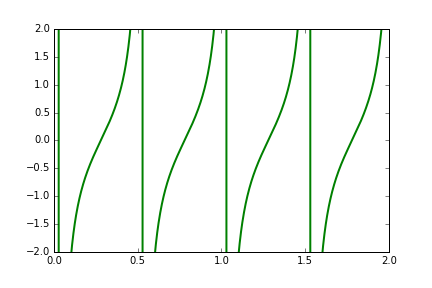
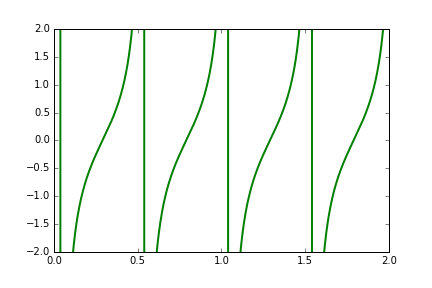
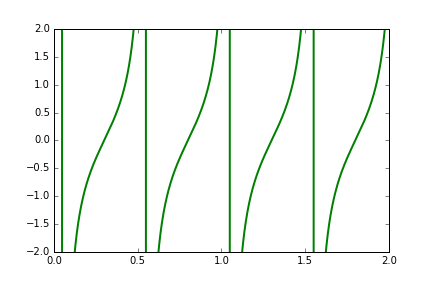
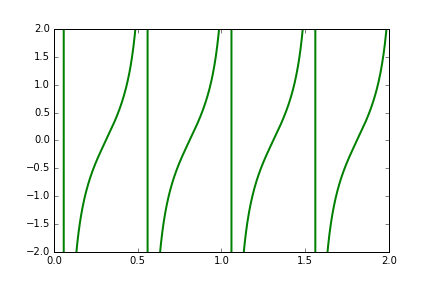
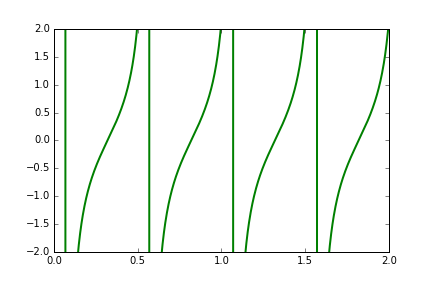
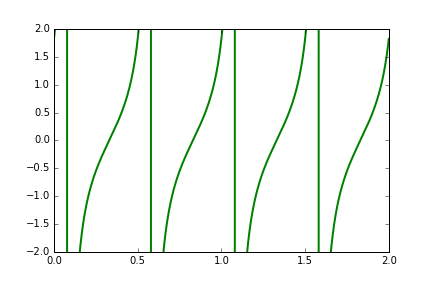
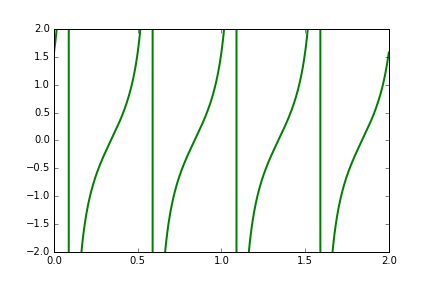
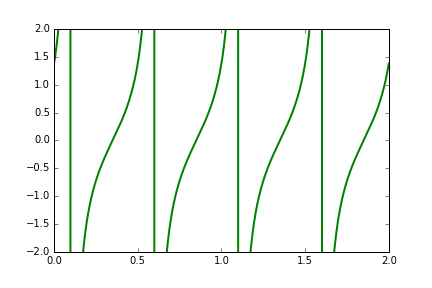
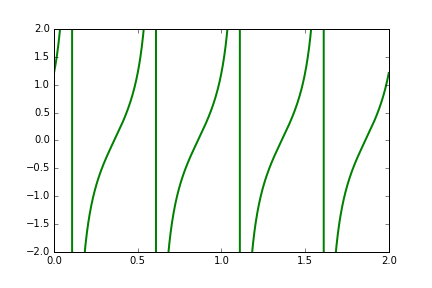
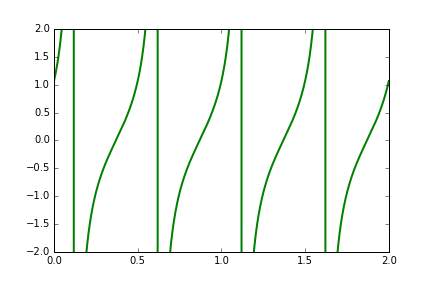
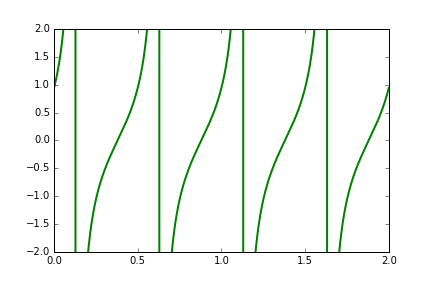
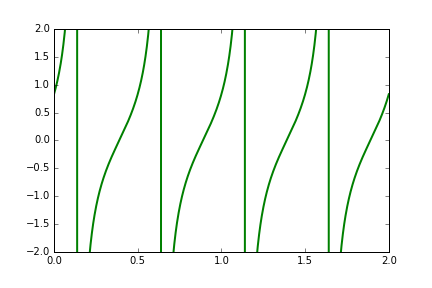
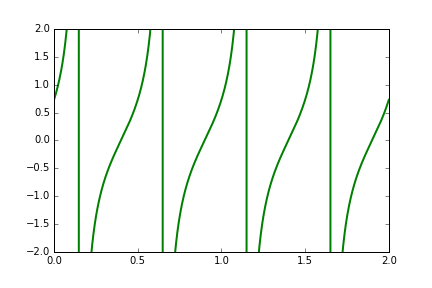
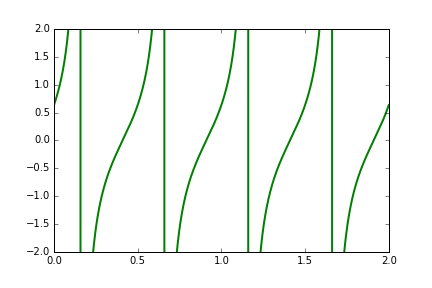
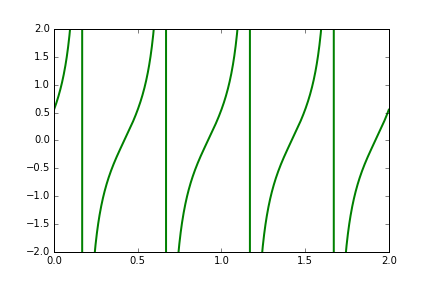
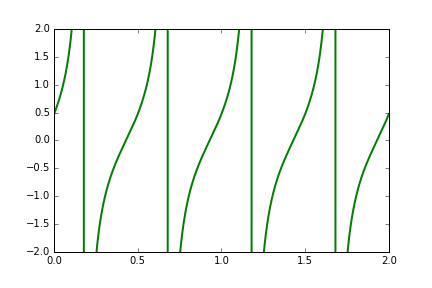
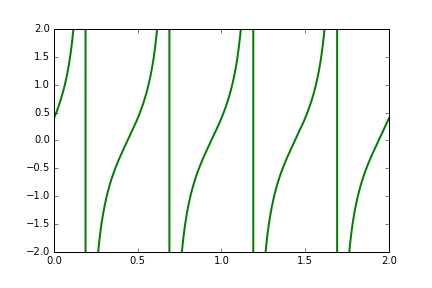
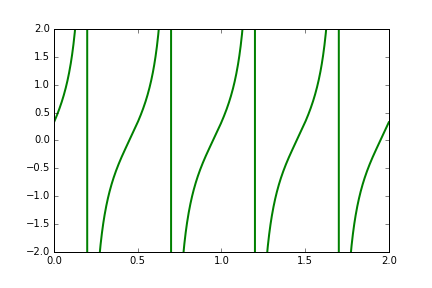
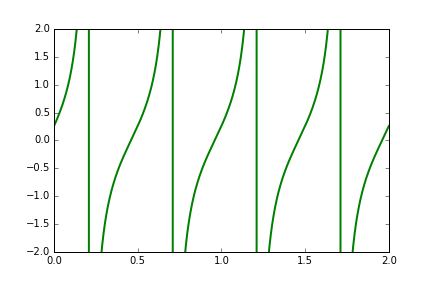
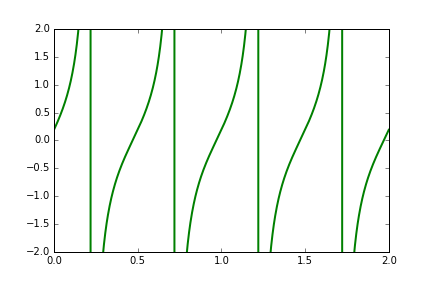
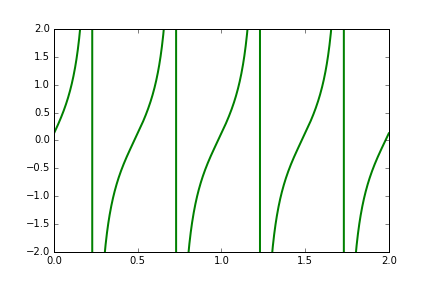
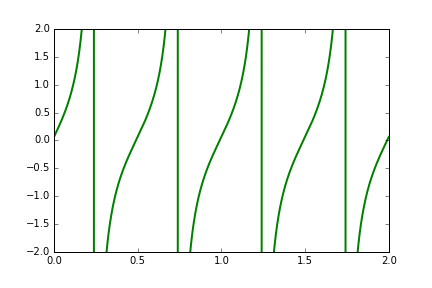
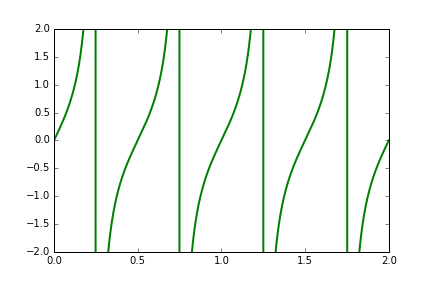
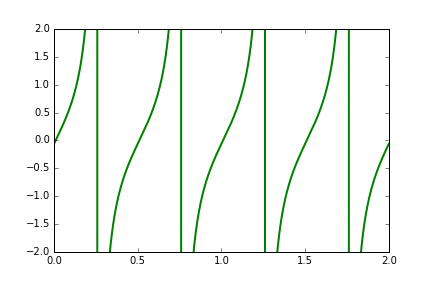
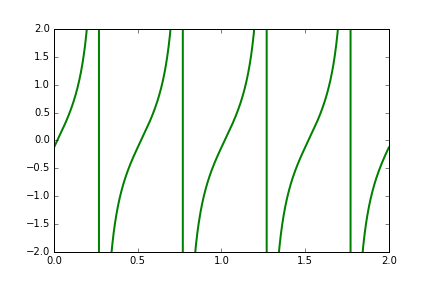
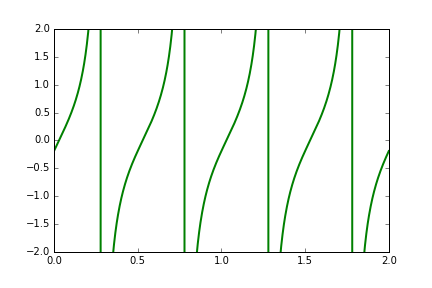
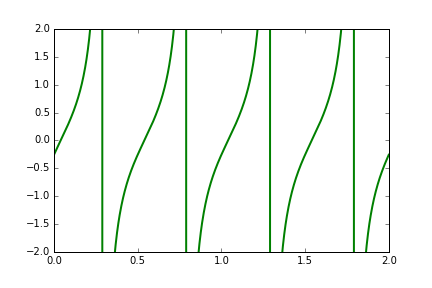
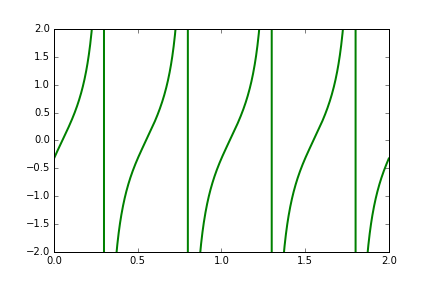
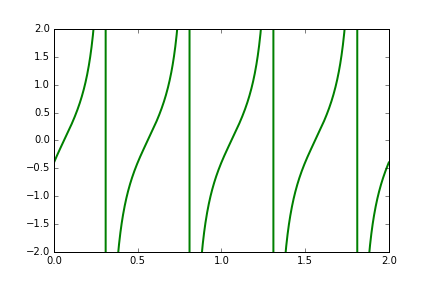
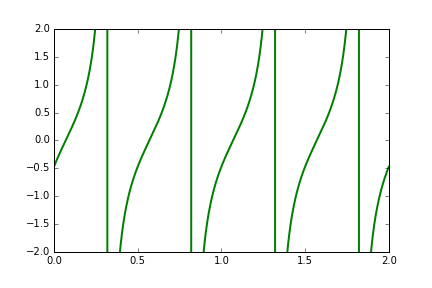
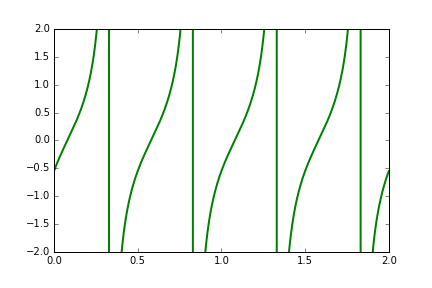
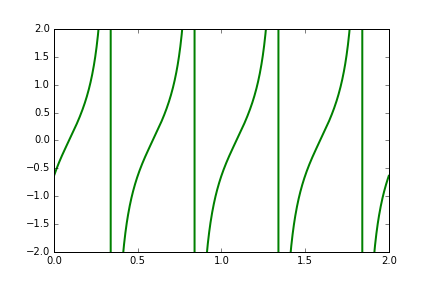
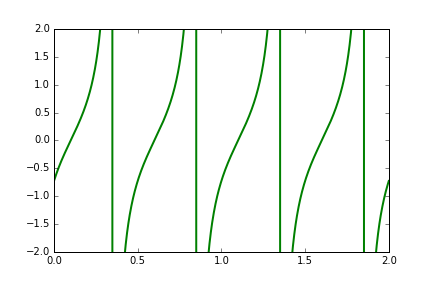
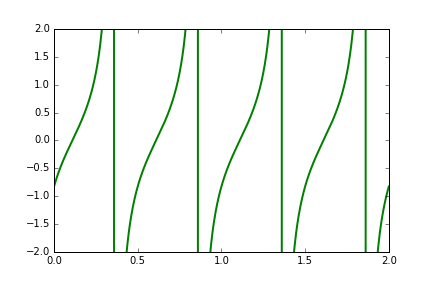
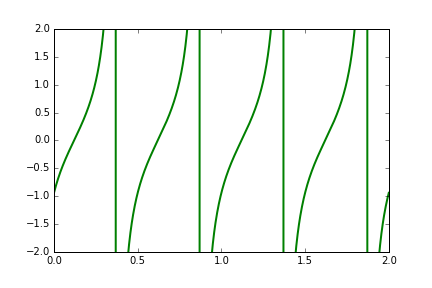
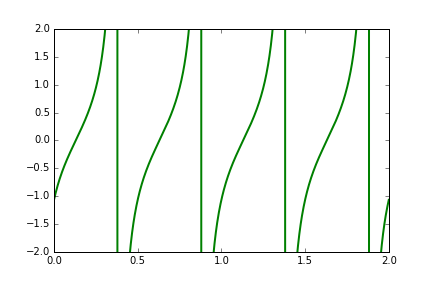
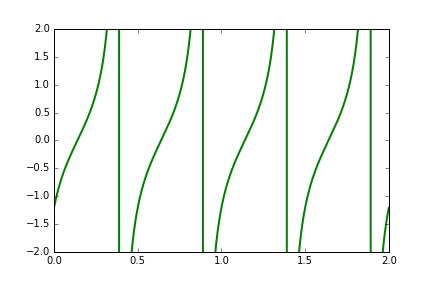
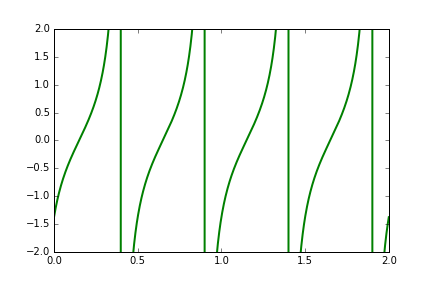
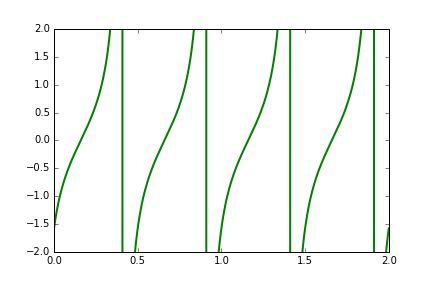
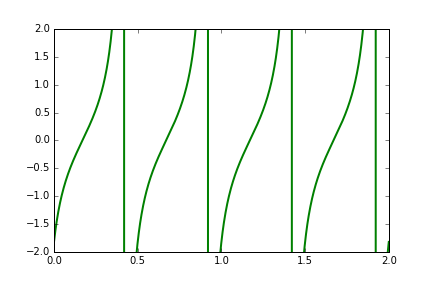
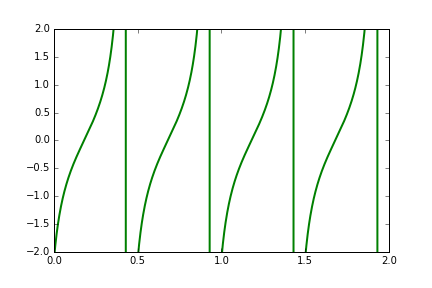
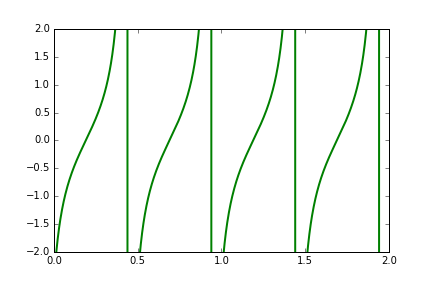
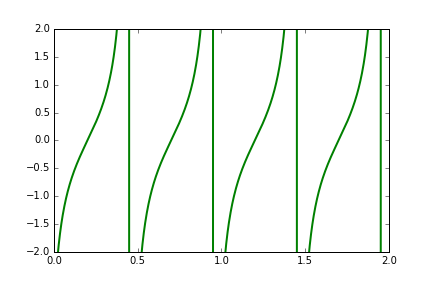
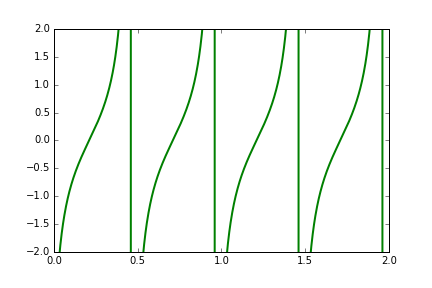
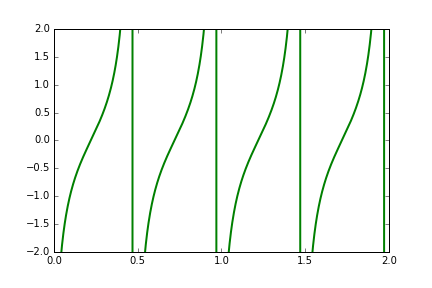
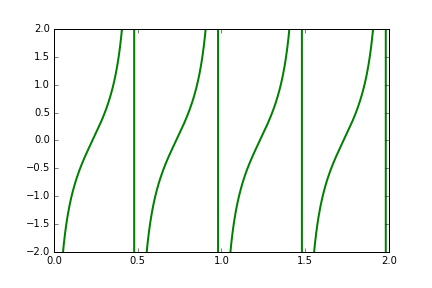
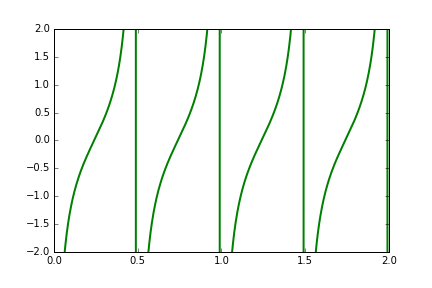
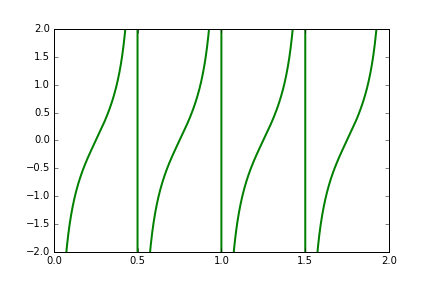
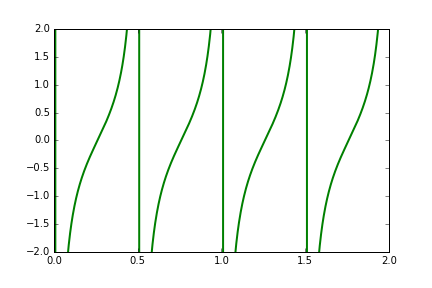
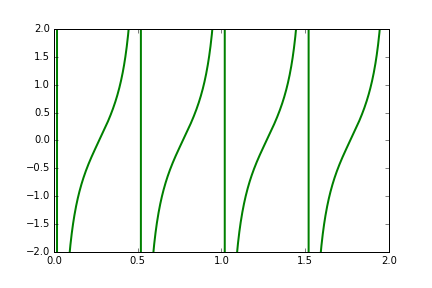
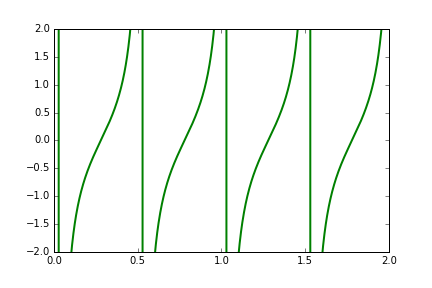
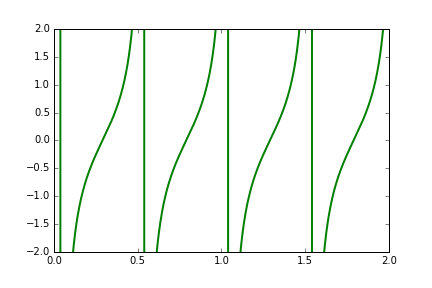
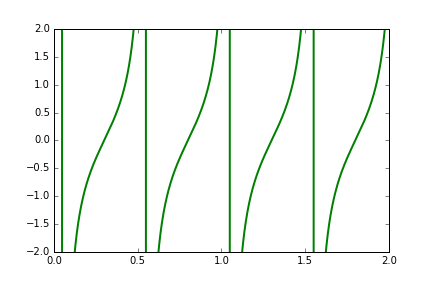
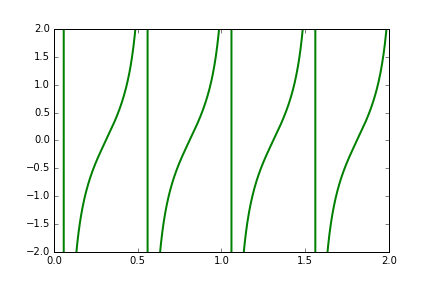
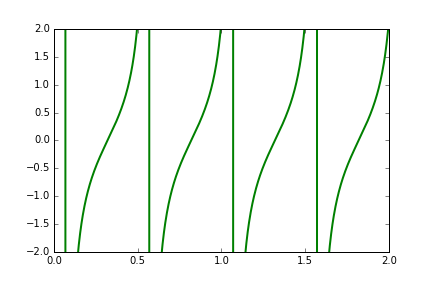
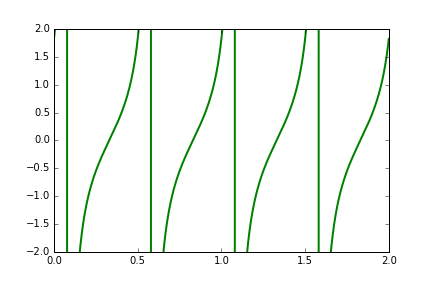
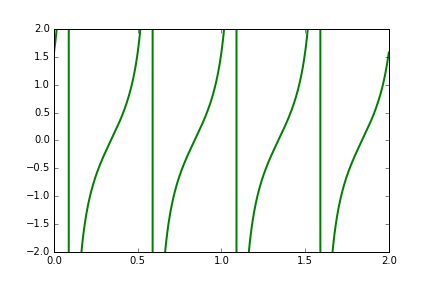
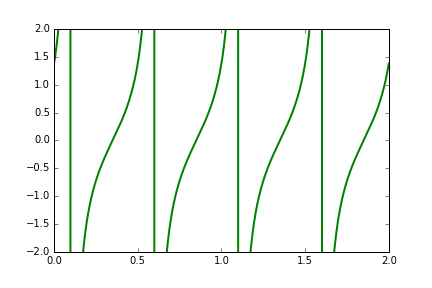
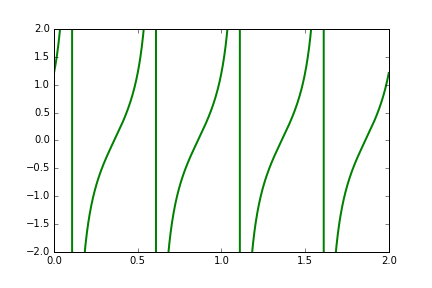
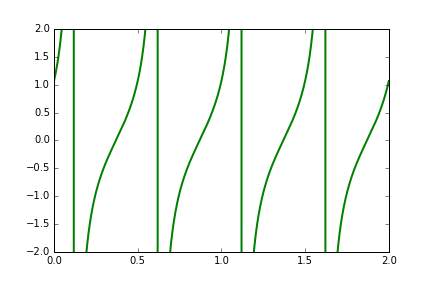
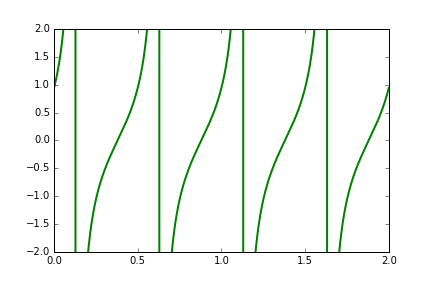
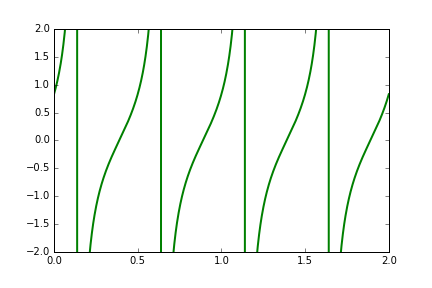
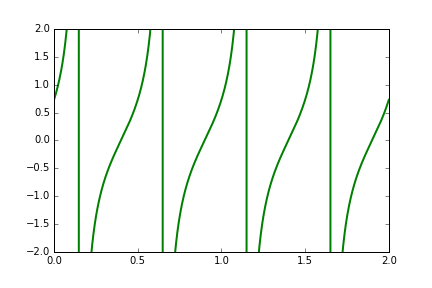
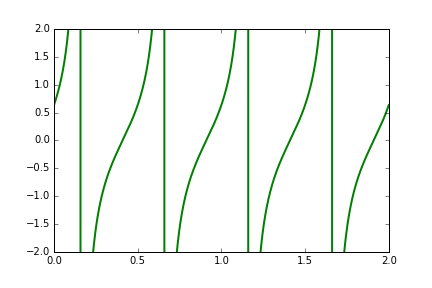
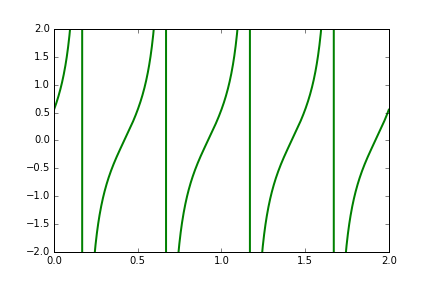
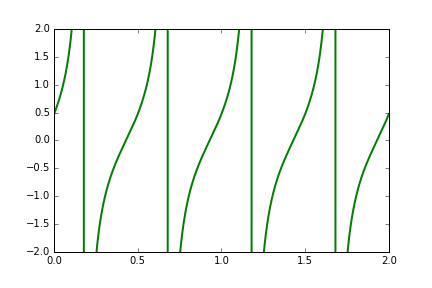
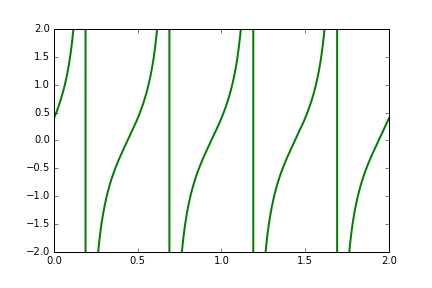
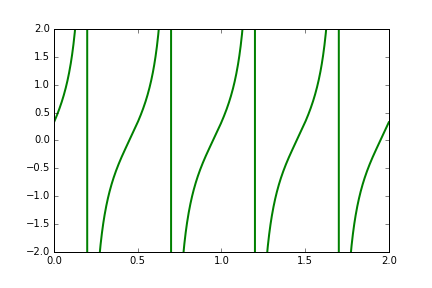
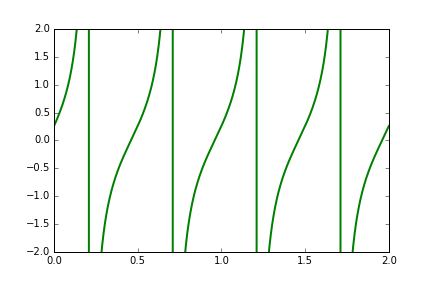
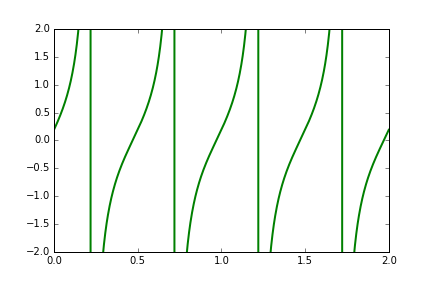
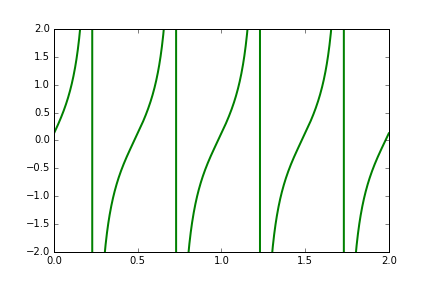
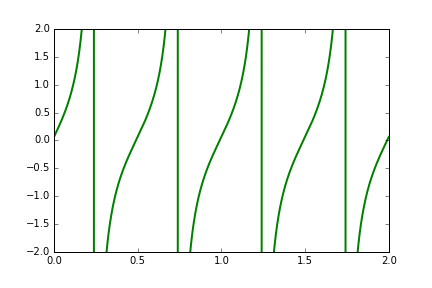
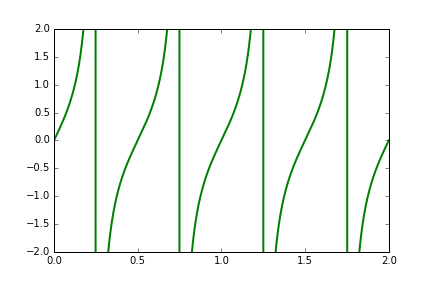
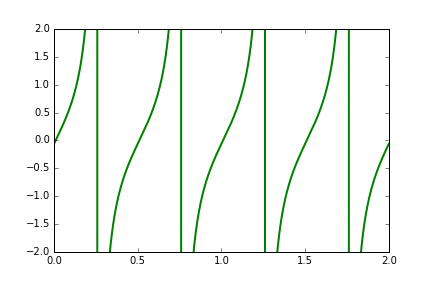
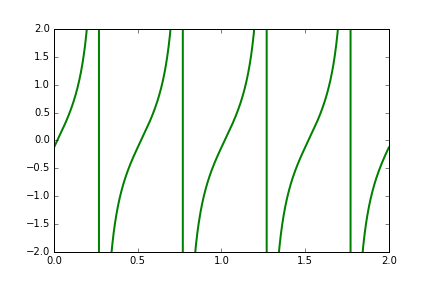
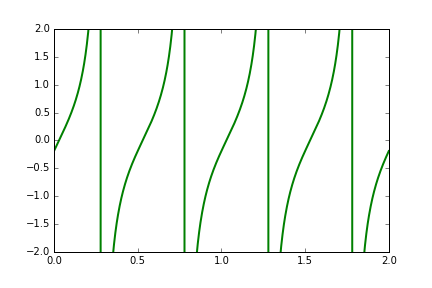
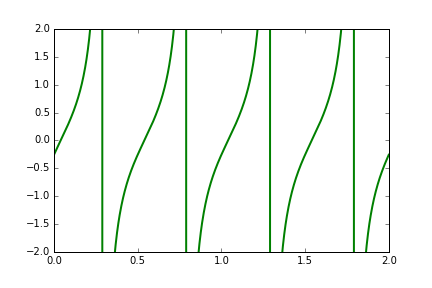
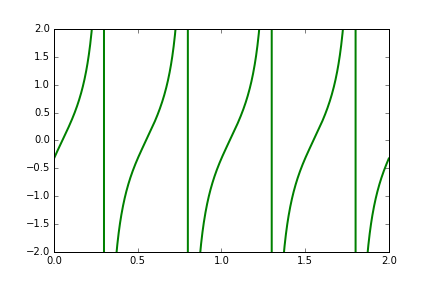
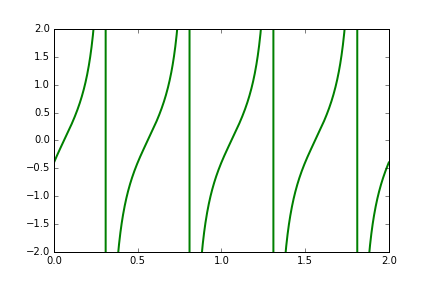
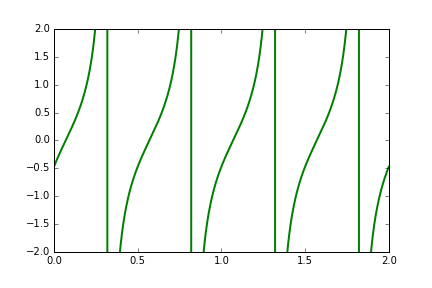
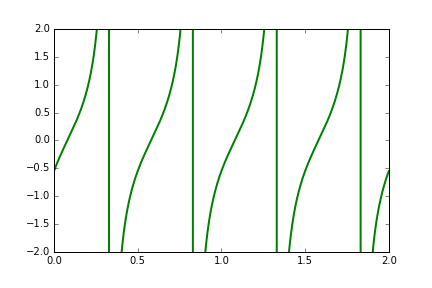
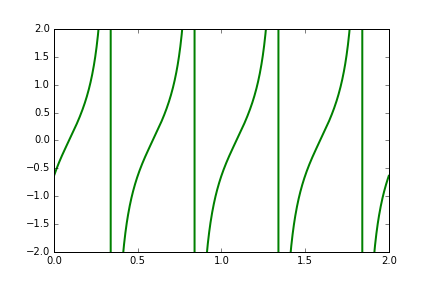
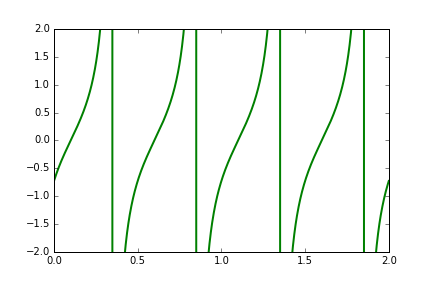
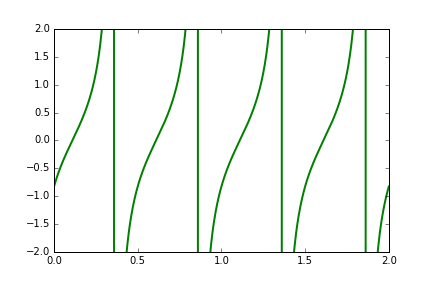
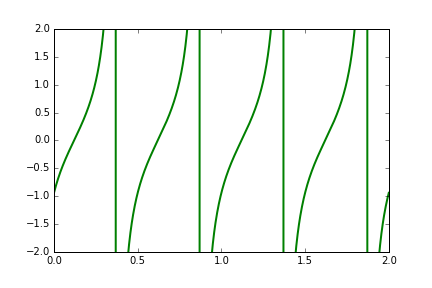
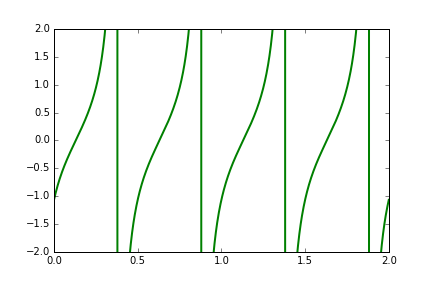
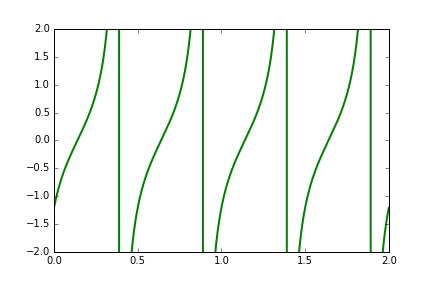
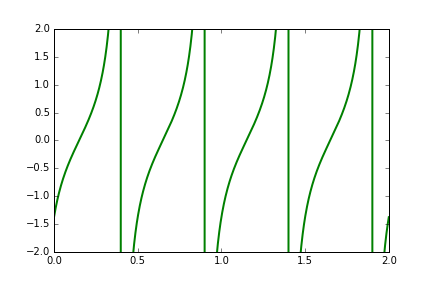
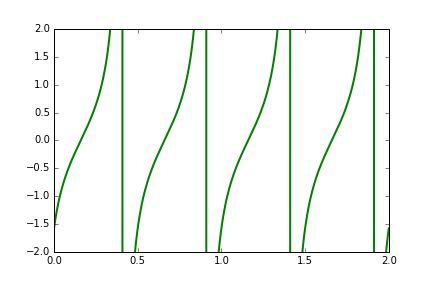
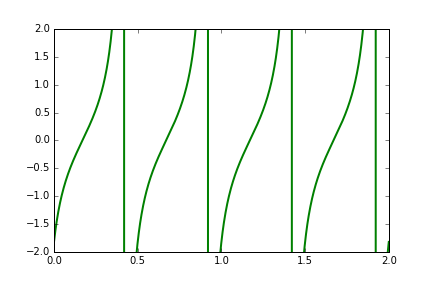
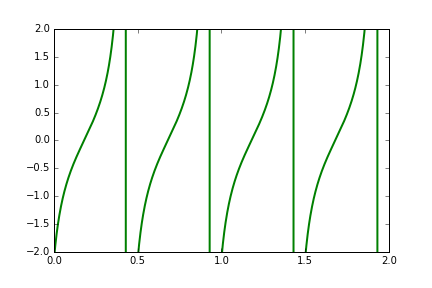
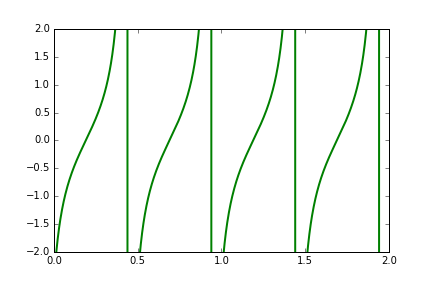
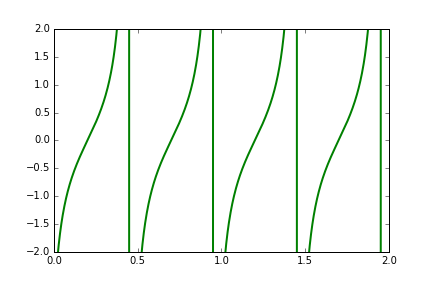
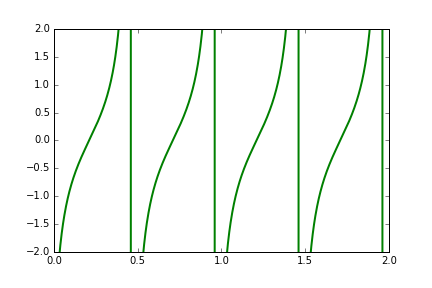
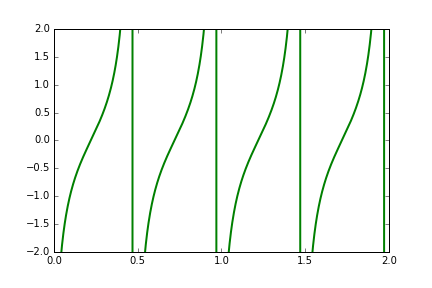
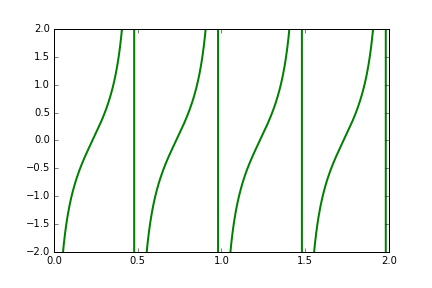
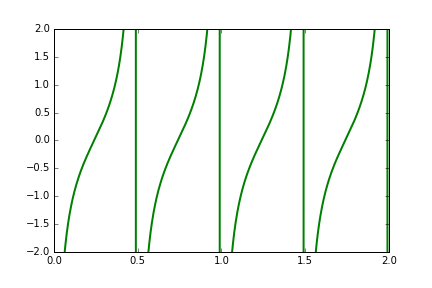
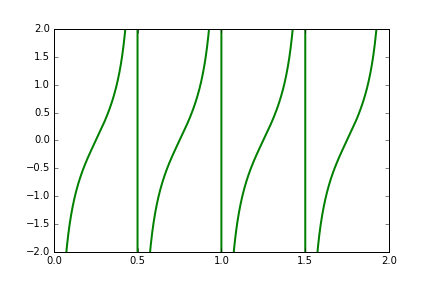
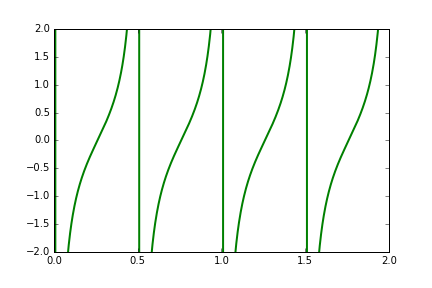
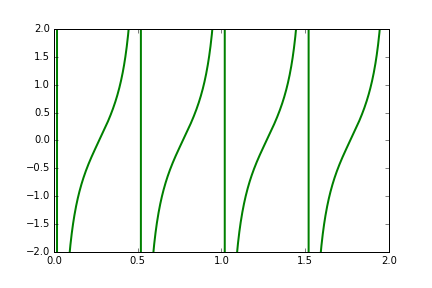
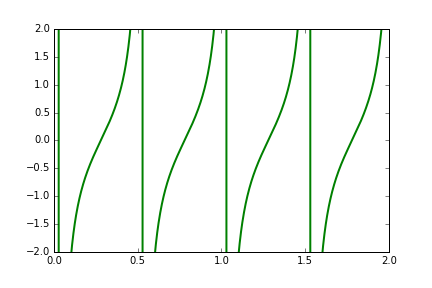
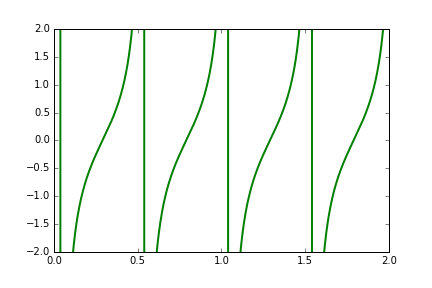
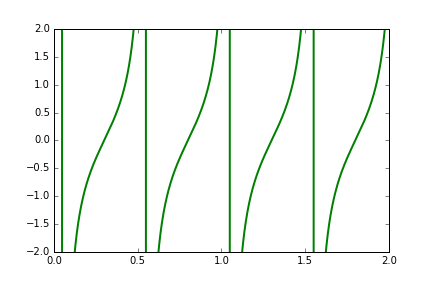
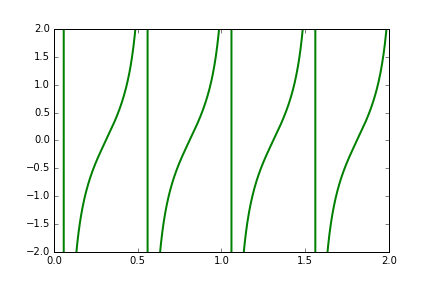
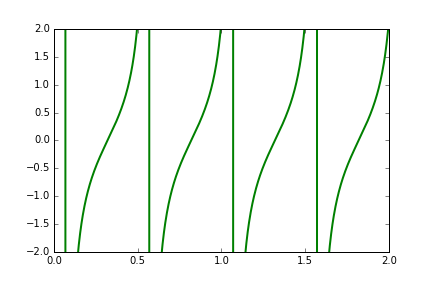
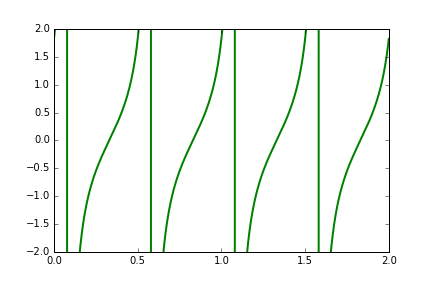
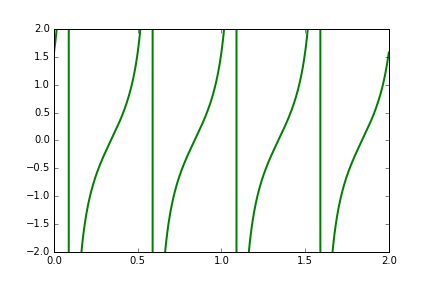
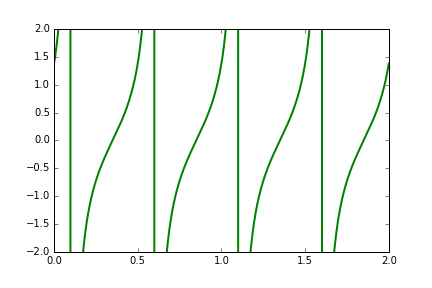
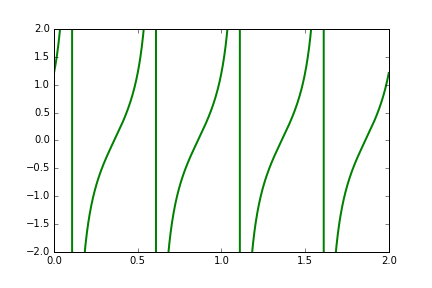
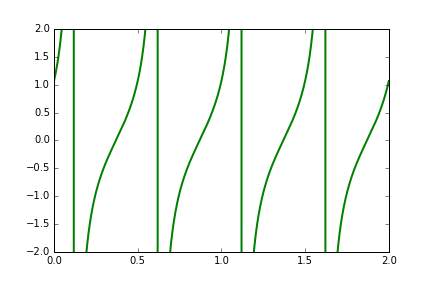
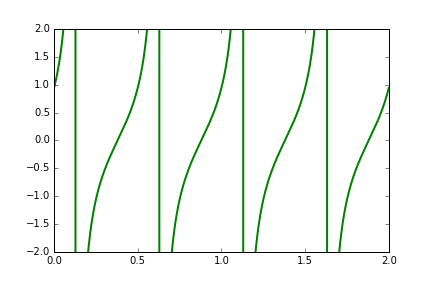
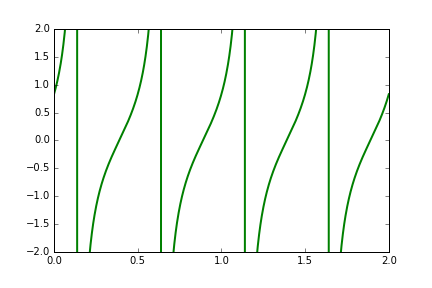
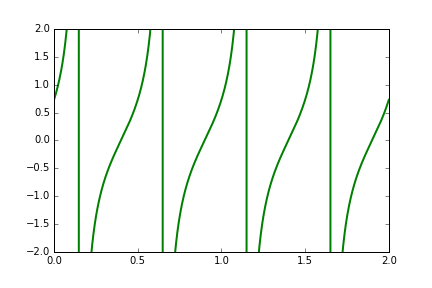
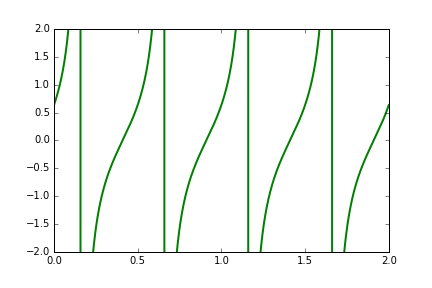
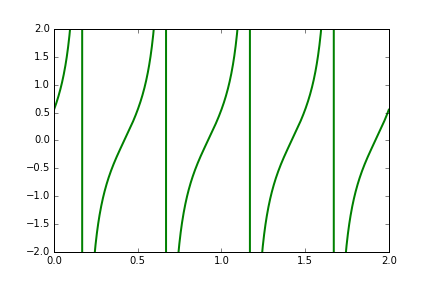
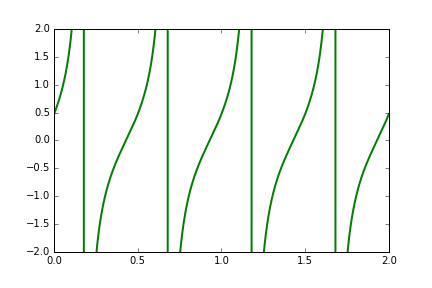
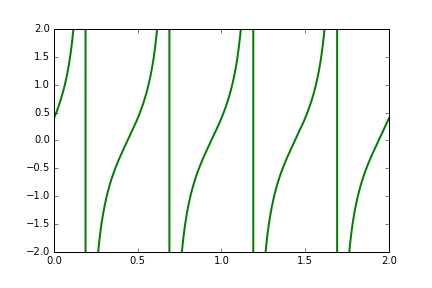
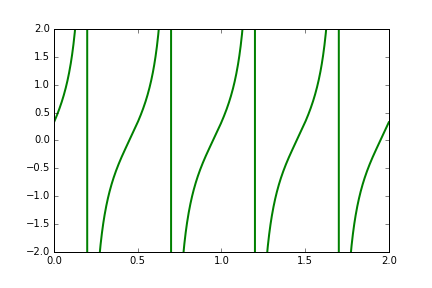
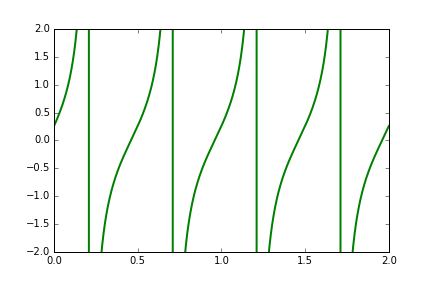
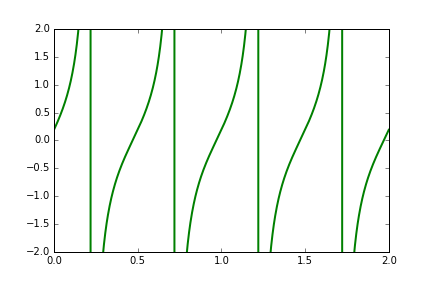
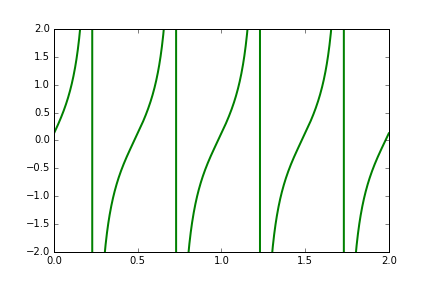
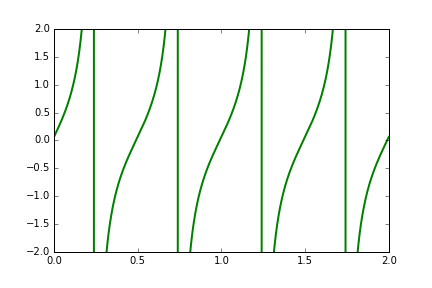

In [70]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2,color="green")

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.tan(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
display_animation(anim)

Let's step through this and see what's going on. First, the script sets up the plot:
```python
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
```
Here we create a figure window, create a single axis in the figure, and then create our line object which will be modified in the animation. Note that here we simply plot an empty line: we'll add data to the line later.

Next we'll create the functions which make the animation happen.  `init()` is the function which will be called to create the base frame upon which the animation takes place. Here we use just a simple function which sets the line data to nothing. It is important that this function return the line object, because this tells the animator which objects on the plot to update after each frame:
```python
def init():
    line.set_data([], [])
    return line,
```
The next piece is the animation function. It takes a single parameter, the frame number `i`, and draws a sine wave with a shift that depends on `i`:
```python
# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
```
Note that again here we return a tuple of the plot objects which have been modified. This tells the animation framework what parts of the plot should be animated.

Finally, we create the animation object and pass it to `dispaly_animation` function:
```python
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
display_animation(anim)
```
This object needs to persist, so it must be assigned to a variable. We've chosen a 100 frame animation with a 20 ms delay between frames. The `blit` keyword is an important one: this tells the animation to only re-draw the pieces of the plot which have changed. The time saved with `blit=True` means that the animations display much more quickly.

## 4. Drip Drop
A very simple rain effect can be obtained by having small growing rings randomly positioned over a figure. Of course, they won't grow forever since the wave is supposed to damp with time. To simulate that, we can use a more and more transparent color as the ring is growing, up to the point where it is no more visible. At this point, we remove the ring and create a new one.

First step is to create a blank figure. Next, we need to create several rings. For this, we can use the scatter plot object that is generally used to visualize points cloud, but we can also use it to draw rings by specifying we don't have a facecolor. We have also to take care of initial size and color for each ring such that we have all size between a minimum and a maximum size and also to make sure the largest ring is almost transparent:

((0, 1), [])

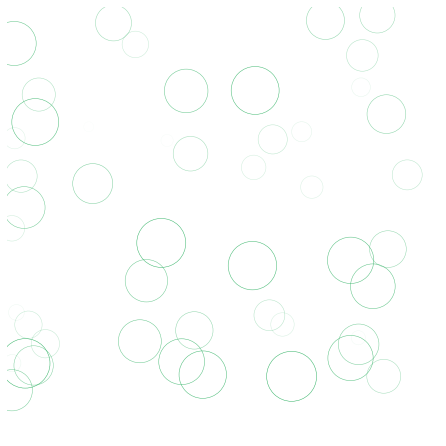

In [71]:
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0.2,0.7,0.4,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

Now, we need to write the update function for our animation. We know that at each time step each ring should grow be more transparent while largest ring should be totally transparent and thus removed. Of course, we won't actually remove the largest ring but re-use it to set a new ring at a new random position, with nominal size and color. Hence, we keep the number of ring constant:

In [72]:
def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)

    # Return the modified object
    return scat,

Last step is to tell `matplotlib` to use this function as an update function for the animation and display the result using `display_animation()` function:

In [73]:
anim = animation.FuncAnimation(fig, update, frames=200, interval=10, blit=True)
display_animation(anim)
plt.show()

## 5. Earthquakes
We'll now use the rain animation to visualize earthquakes on the planet from the last 30 days. The USGS Earthquake Hazards Program is part of the National Earthquake Hazards Reduction Program (NEHRP) and provides several data on their website. Those data are sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. You would be surprised by the number of minor earthquakes happening every hour on the planet. Since this would represent too much data for us, we'll stick to earthquakes with magnitude > 4.5. At the time of writing, this already represent more than 400 earthquakes in the last 30 days.

### 5.1 `urllib` for Reading Remote Data
First step is to read and convert data. We'll use the `urllib` library that allows to open and read remote data. Data on the website use the CSV format whose content is given by the first line:

```
time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
2015-08-17T13:49:17.320Z,37.8365,-122.2321667,4.82,4.01,mw,...
2015-08-15T07:47:06.640Z,-10.9045,163.8766,6.35,6.6,mwp,...
```
We are only interested in latitude, longitude and magnitude and we won't parse time of event.

### 5.2 Installing `basemap`
Now, we need to draw earth on a figure to show precisely where the earthquake center is and to translate latitude/longitude in some coordinates `matplotlib` can handle. Fortunately, there is the `basemap` project (that tends to be replaced by the more complete `cartopy`) that is really simple to install and to use. Use `conda` to install it:
```bash
conda install basemap
```

In [74]:
import urllib
from mpl_toolkits.basemap import Basemap

# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the last 30 days
#url = urllib.request.urlopen(feed + "significant_month.csv")

# Magnitude > 4.5
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Magnitude > 2.5
#url = urllib.request.urlopen(feed + "2.5_month.csv")

# Magnitude > 1.0
#url = urllib.request.urlopen(feed + "1.0_month.csv")

# Reading and storage of data
data = url.read().split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])

for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])

First step is to define a projection to draw the earth onto a screen (there exists many different projections) and we'll stick to the mill projection which is rather standard for non-specialist. Next, we request to draw coastline and fill continents. The `earth` object will also be used to translate coordinate quite automatically. Last step is to adapt the rain code and put some eye candy. If everything went well, you should obtain something like this (with animation):
<img style="float: right;" src="images/earthquakes.png" />

In [75]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)

earth = Basemap(projection='mill')

earth.drawcoastlines(color='0.50', linewidth=0.25)
earth.fillcontinents(color='0.95')

P = np.zeros(50, dtype=[('position', float, 2),
                         ('size',     float, 1),
                         ('growth',   float, 1),
                         ('color',    float, 4)])
scat = ax.scatter(P['position'][:,0], P['position'][:,1], P['size'], lw=0.5,
                  edgecolors = P['color'], facecolors='None', zorder=10)

def update(frame):
    current = frame % len(E)
    i = frame % len(P)

    P['color'][:,3] = np.maximum(0, P['color'][:,3] - 1.0/len(P))
    P['size'] += P['growth']

    magnitude = E['magnitude'][current]
    P['position'][i] = earth(*E['position'][current])
    P['size'][i] = 5
    P['growth'][i]= np.exp(magnitude) * 0.1

    if magnitude < 6:
        P['color'][i]    = 0,0,1,1
    else:
        P['color'][i]    = 1,0,0,1
    scat.set_edgecolors(P['color'])
    scat.set_facecolors(P['color']*(1,1,1,0.25))
    scat.set_sizes(P['size'])
    scat.set_offsets(P['position'])
    return scat,

anim = animation.FuncAnimation(fig, update, frames=200, interval=10, blit=True)
display_animation(anim)
plt.show()